# Time Series
Prediction in future is known as Forcasting - x axis time and y axis prediction
- Trends (Consistent Increasing or Decreasing)
- Season (Pattern related to time of week/month/quarter/year/festival)
- Cycles (Patterns that are beyond a year, only seen in dataset having lots of years of data)
- Irregulr patterns are error


## Types
- Additive Time Series
- Multiplicative Time Series

Moving Average - Avg of moving set of points is calculated and curve is fitted along with avg points.

Exponential Smoothing - Nearest pt. gets higher weightage while fitting curve

## Error Analysis
- MAPE - Mean Absolute Percentage Error
- MAD - Mean Absolute Deviaton
- MSD - Mean Squared Deviation

In [1]:
library(quantmod)
library(forecast)
library(fpp)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: tseries


In [2]:
# Loading Google stock data using NASDAQ (GOOG)
from.dat <- as.Date("04/01/14", format = "%m/%d/%y")
to.dat <- as.Date("10/30/17", format = "%m/%d/%y")
getSymbols("GOOG", src = "yahoo", from = from.dat, to = to.dat)
head(GOOG)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "GOOG"

           GOOG.Open GOOG.High GOOG.Low GOOG.Close GOOG.Volume GOOG.Adjusted
2014-04-01  555.6547  565.3414 555.6547   564.0585        7900      564.0585
2014-04-02  596.7090  601.5225 559.1157   563.8994      147500      563.8994
2014-04-03  566.7338  584.0685 561.0450   566.6244     5113100      566.6244
2014-04-04  571.5076  574.6105 540.0306   540.1699     6386800      540.1699
2014-04-07  537.7830  545.4807 524.2673   535.2072     4413700      535.2072
2014-04-08  539.6328  551.9650 538.6482   551.8655     3159900      551.8655

In [3]:
# Converting to monthly stocks
mGoog <- to.monthly(GOOG)
head(mGoog)

         GOOG.Open GOOG.High GOOG.Low GOOG.Close GOOG.Volume GOOG.Adjusted
Apr 2014  555.6547  601.5225 500.0504   523.7800    67539600      523.7800
May 2014  524.2275  564.7348 500.5477   556.8282    36727500      556.8282
Jun 2014  557.6339  579.2649 535.8038   572.1341    38105800      572.1341
Jul 2014  575.1575  596.3709 561.9203   568.4742    34704900      568.4742
Aug 2014  567.2808  584.1282 556.9377   568.4742    27734000      568.4742
Sep 2014  568.7228  593.2181 565.1028   574.2027    33608300      574.2027

In [4]:
googOpen <- Op(mGoog)
googOpen

         GOOG.Open
Apr 2014  555.6547
May 2014  524.2275
Jun 2014  557.6339
Jul 2014  575.1575
Aug 2014  567.2808
Sep 2014  568.7228
Oct 2014  572.8601
Nov 2014  552.4623
Dec 2014  535.9531
Jan 2015  526.1147
Feb 2015  528.8199
Mar 2015  557.4623
Apr 2015  545.5975
May 2015  538.4300
Jun 2015  536.7900
Jul 2015  524.7300
Aug 2015  625.3400
Sep 2015  602.3600
Oct 2015  608.3700
Nov 2015  711.0600
Dec 2015  747.1100
Jan 2016  743.0000
Feb 2016  750.4600
Mar 2016  703.6200
Apr 2016  738.6000
May 2016  697.6300
Jun 2016  734.5300
Jul 2016  692.2000
Aug 2016  761.0900
Sep 2016  769.2500
Oct 2016  774.2500
Nov 2016  782.8900
Dec 2016  757.4400
Jan 2017  778.8100
Feb 2017  799.6800
Mar 2017  828.8500
Apr 2017  829.2200
May 2017  901.9400
Jun 2017  968.9500
Jul 2017  912.1800
Aug 2017  932.3800
Sep 2017  941.1300
Oct 2017  959.9800

In [5]:
# Creating timeseries
ts1 <- ts(googOpen, frequency = 12)
ts1

       Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1 555.6547 524.2275 557.6339 575.1575 567.2808 568.7228 572.8601 552.4623
2 545.5975 538.4300 536.7900 524.7300 625.3400 602.3600 608.3700 711.0600
3 738.6000 697.6300 734.5300 692.2000 761.0900 769.2500 774.2500 782.8900
4 829.2200 901.9400 968.9500 912.1800 932.3800 941.1300 959.9800         
       Sep      Oct      Nov      Dec
1 535.9531 526.1147 528.8199 557.4623
2 747.1100 743.0000 750.4600 703.6200
3 757.4400 778.8100 799.6800 828.8500
4                                    

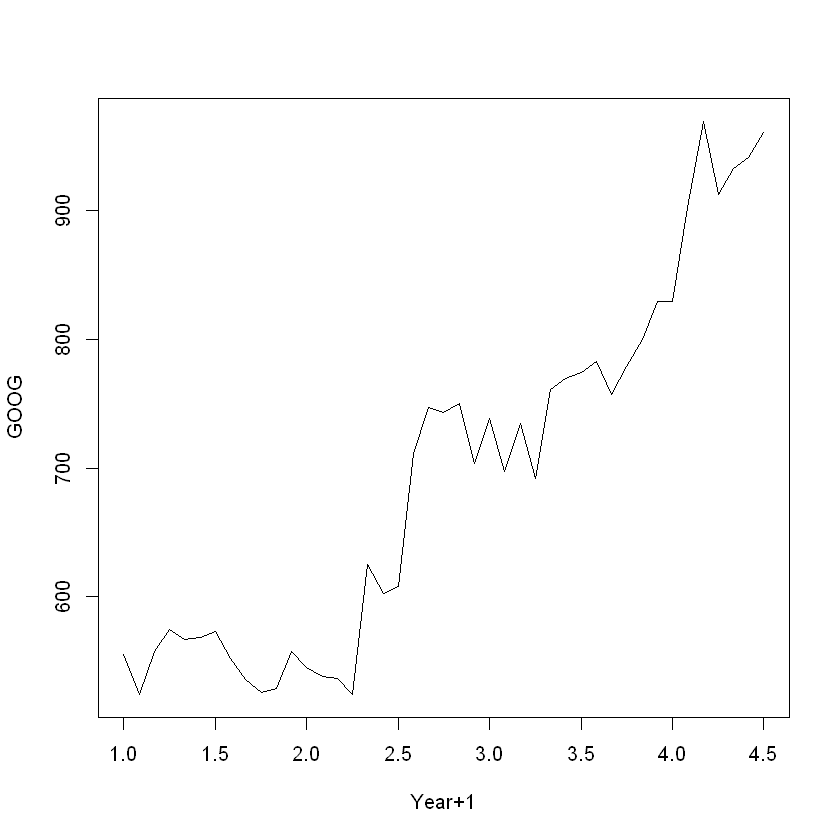

In [6]:
# plot time series
plot(ts1, xlab = "Year+1", ylab = "GOOG")

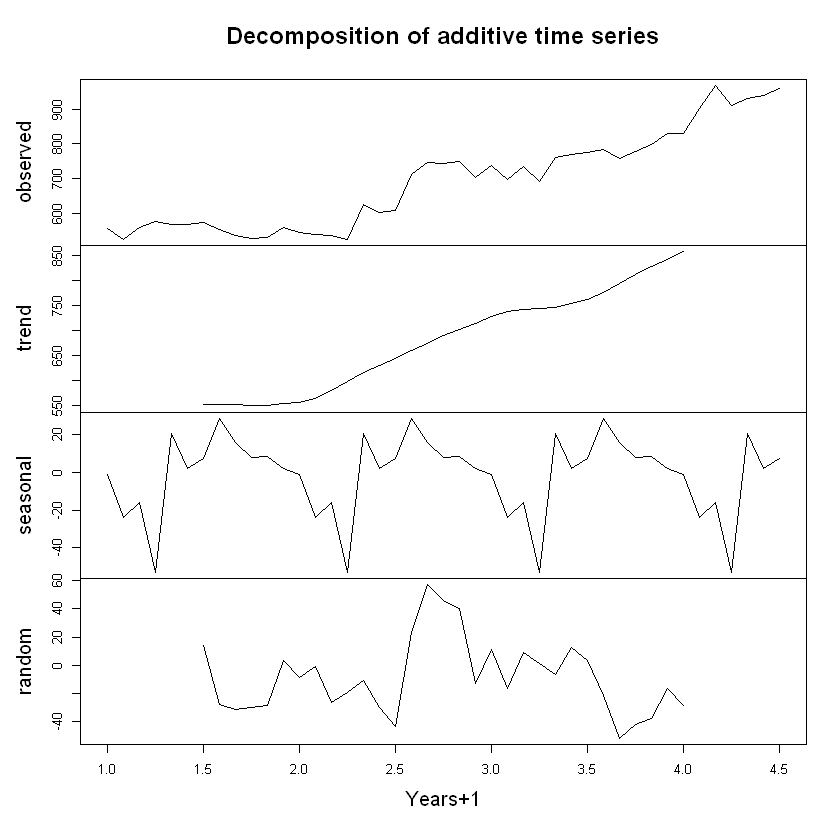

In [7]:
# Decompose the time series
plot(decompose(ts1), xlab = "Years+1")

In [8]:
# Training and Testing Data
ts1Train<-window(ts1,start=1,emd=3.5)
ts1Test<-window(ts1,start=3.5,emd=4.5)

ts1Train
ts1Test

       Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1 555.6547 524.2275 557.6339 575.1575 567.2808 568.7228 572.8601 552.4623
2 545.5975 538.4300 536.7900 524.7300 625.3400 602.3600 608.3700 711.0600
3 738.6000 697.6300 734.5300 692.2000 761.0900 769.2500 774.2500 782.8900
4 829.2200 901.9400 968.9500 912.1800 932.3800 941.1300 959.9800         
       Sep      Oct      Nov      Dec
1 535.9531 526.1147 528.8199 557.4623
2 747.1100 743.0000 750.4600 703.6200
3 757.4400 778.8100 799.6800 828.8500
4                                    

     Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov
3                                           774.25 782.89 757.44 778.81 799.68
4 829.22 901.94 968.95 912.18 932.38 941.13 959.98                            
     Dec
3 828.85
4       

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"

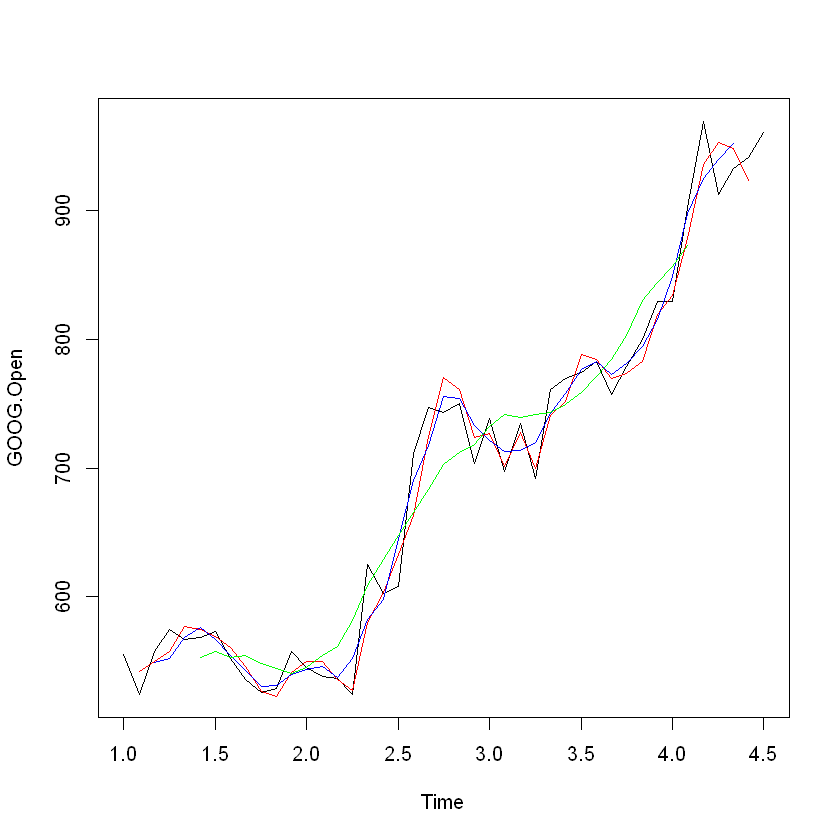

In [9]:
# Forcasting using simple moving average
# For univariate time series
# ETS(A,A,N)
plot(ts1)

goog_ma<-ma(ts1Train, order = 3)
goog_ma_forecast<-forecast(goog_ma)
lines(goog_ma_forecast$fitted, col="red")
#lines(goog_ma_forecast$mean, col="blue")

goog_ma<-ma(ts1Train, order = 4)
goog_ma_forecast<-forecast(goog_ma)
lines(goog_ma_forecast$fitted, col="blue")
#lines(goog_ma_forecast$mean, col="yellow")

goog_ma<-ma(ts1Train, order = 10)
goog_ma_forecast<-forecast(goog_ma)
lines(goog_ma_forecast$fitted, col="green")
#lines(goog_ma_forecast$mean, col="orange")

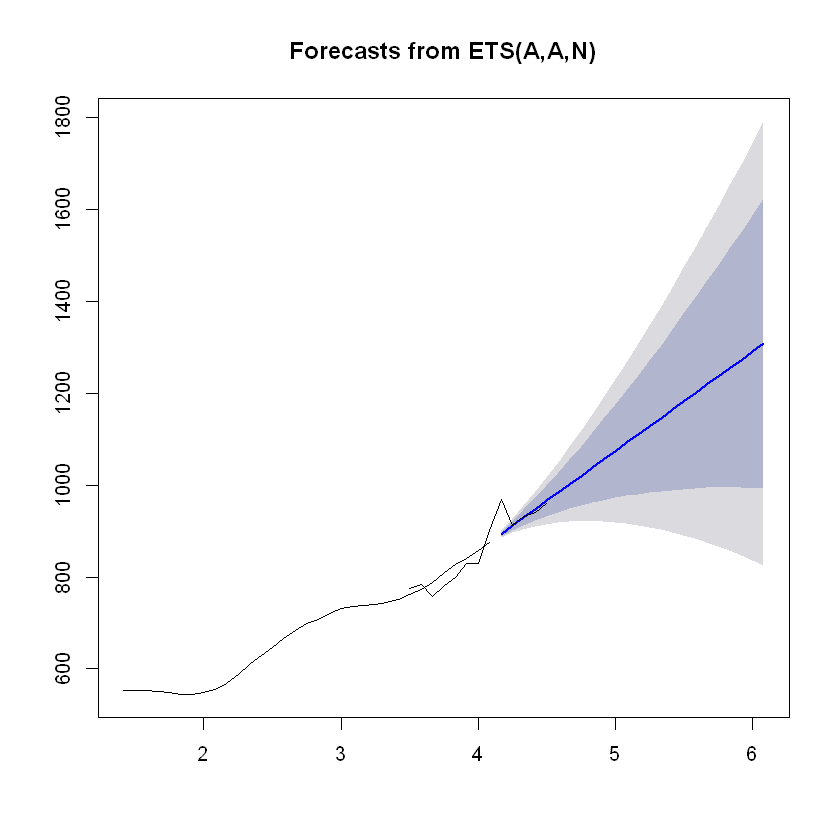

In [10]:
plot(goog_ma_forecast)
lines(ts1Test)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = ts1Train, h = 10, alpha = 0.9) 

  Smoothing parameters:
    alpha = 0.9 

  Initial states:
    l = 552.8499 

  sigma:  36.7855

     AIC     AICc      BIC 
473.7224 474.0224 477.2448 

Error measures:
                   ME    RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 10.46879 35.9198 25.76575 1.274793 3.630136 0.2030472 -0.1317004

Forecasts:
      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Aug 4       957.9922 910.8497 1005.135 885.8940 1030.090
Sep 4       957.9922 894.5685 1021.416 860.9940 1054.990
Oct 4       957.9922 881.6855 1034.299 841.2911 1074.693
Nov 4       957.9922 870.6831 1045.301 824.4645 1091.520
Dec 4       957.9922 860.9199 1055.065 809.5330 1106.451
Jan 5       957.9922 852.0527 1063.932 795.9717 1120.013
Feb 5       957.9922 843.8724 1072.112 783.4610 1132.523
Mar 5       957.9922 836.2405 1079.744 771.7890 1144.195
Ap

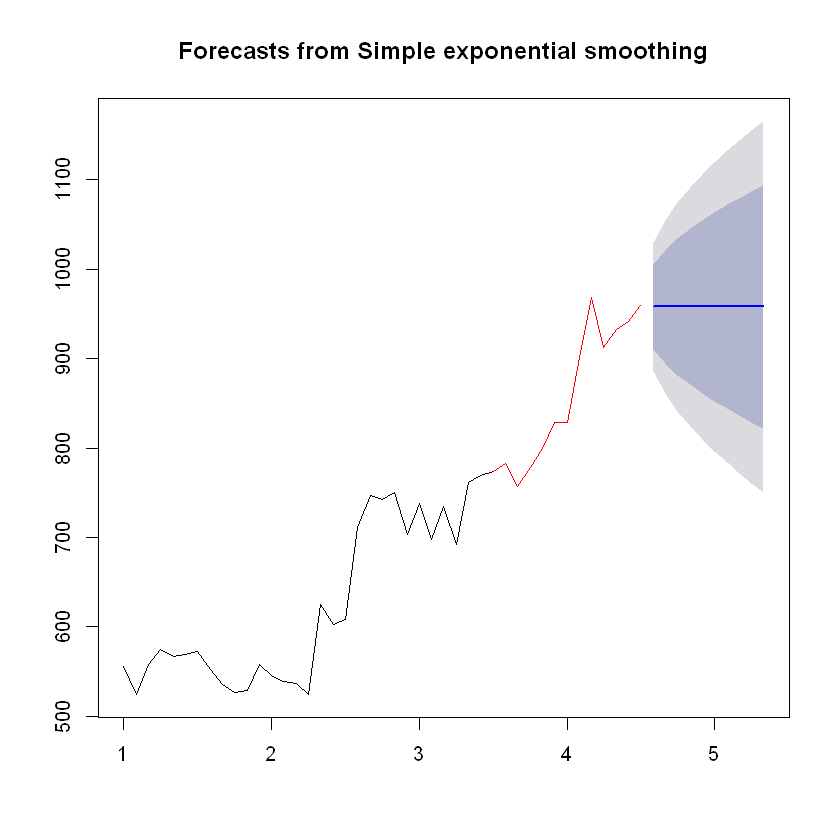

In [11]:
# Simple exponential smoothing model for short term foecasting
fit<-ses(ts1Train, h=10, alpha = 0.9)
plot(fit)
lines(ts1Test, col="red")
summary(fit)

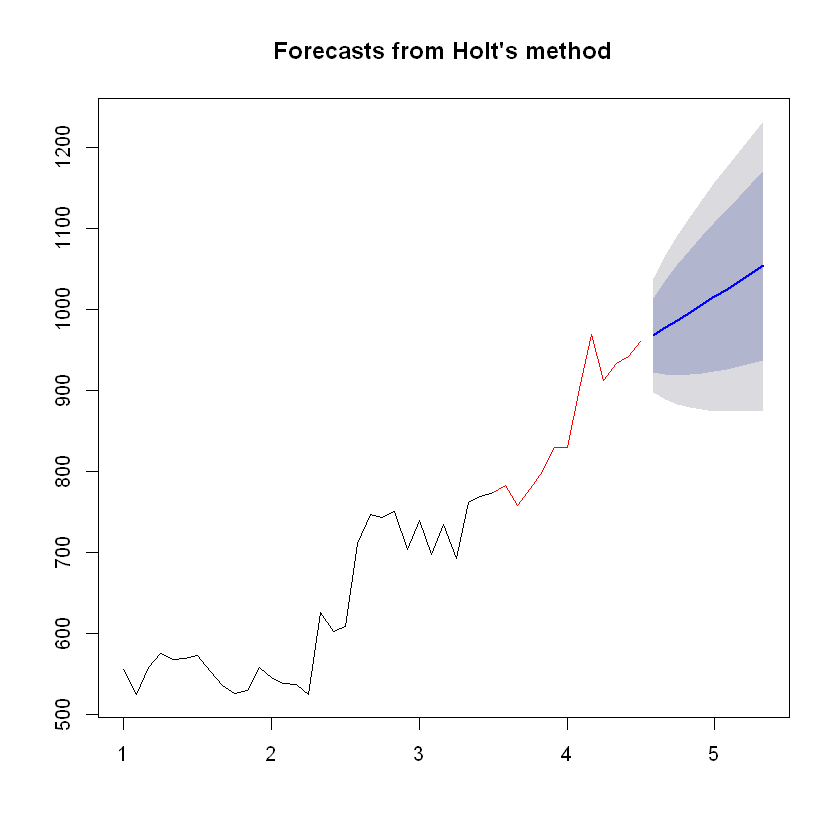

In [12]:
# Double exponentil smoothing model
# Holt local trend method (Level and Trend)
fit<-holt(ts1Train, h=10)
plot(fit)
lines(ts1Test, col = "red")



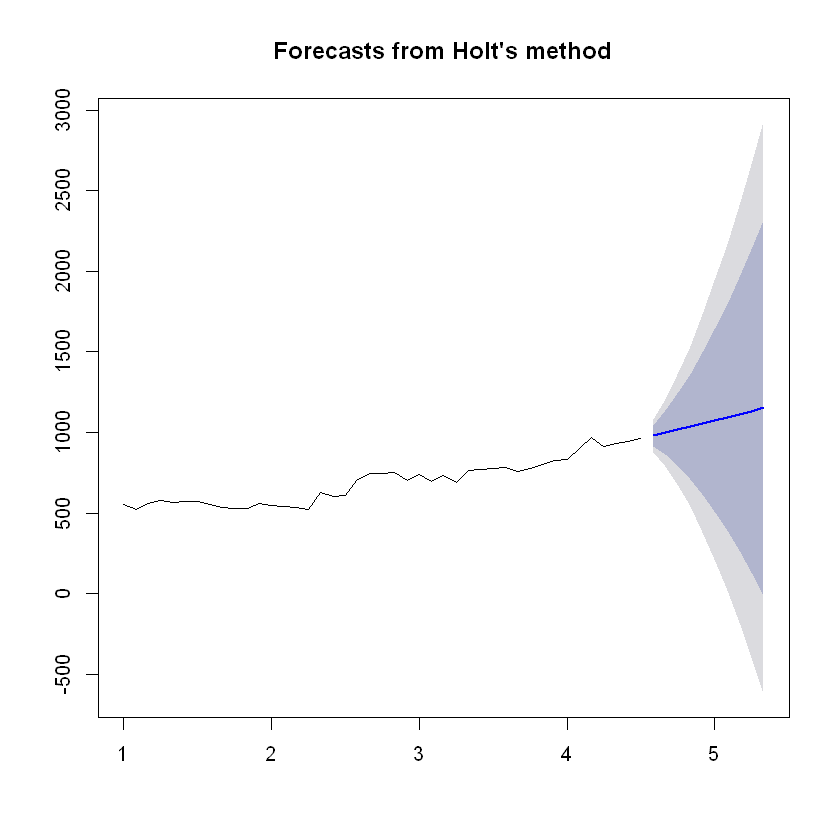

In [13]:
fit<-holt(ts1Train, h=10, alpha = 0.9, beta = 0.9)
plot(fit)

# ETS - Error Trend Season
A - Additive

M - Multiplicative

Z - Automatic

      Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
Aug 4       967.4950  921.5768 1013.413 897.2692 1037.721
Sep 4       977.0274  918.8235 1035.231 888.0122 1066.043
Oct 4       986.5598  918.2427 1054.877 882.0778 1091.042
Nov 4       996.0923  918.9748 1073.210 878.1513 1114.033
Dec 4      1005.6247  920.6111 1090.638 875.6077 1135.642
Jan 5      1015.1571  922.9192 1107.395 874.0914 1156.223
Feb 5      1024.6895  925.7517 1123.627 873.3772 1176.002
Mar 5      1034.2219  929.0085 1139.435 873.3119 1195.132
Apr 5      1043.7544  932.6176 1154.891 873.7853 1213.723
May 5      1053.2868  936.5254 1170.048 874.7156 1231.858
Jun 5      1062.8192  940.6906 1184.948 876.0396 1249.599
Jul 5      1072.3516  945.0807 1199.623 877.7075 1266.996
Aug 5      1081.8840  949.6693 1214.099 879.6791 1284.089
Sep 5      1091.4165  954.4351 1228.398 881.9216 1300.911
Oct 5      1100.9489  959.3601 1242.538 884.4076 1317.490
Nov 5      1110.4813  964.4293 1256.533 887.1140 1333.849
Dec 5      112

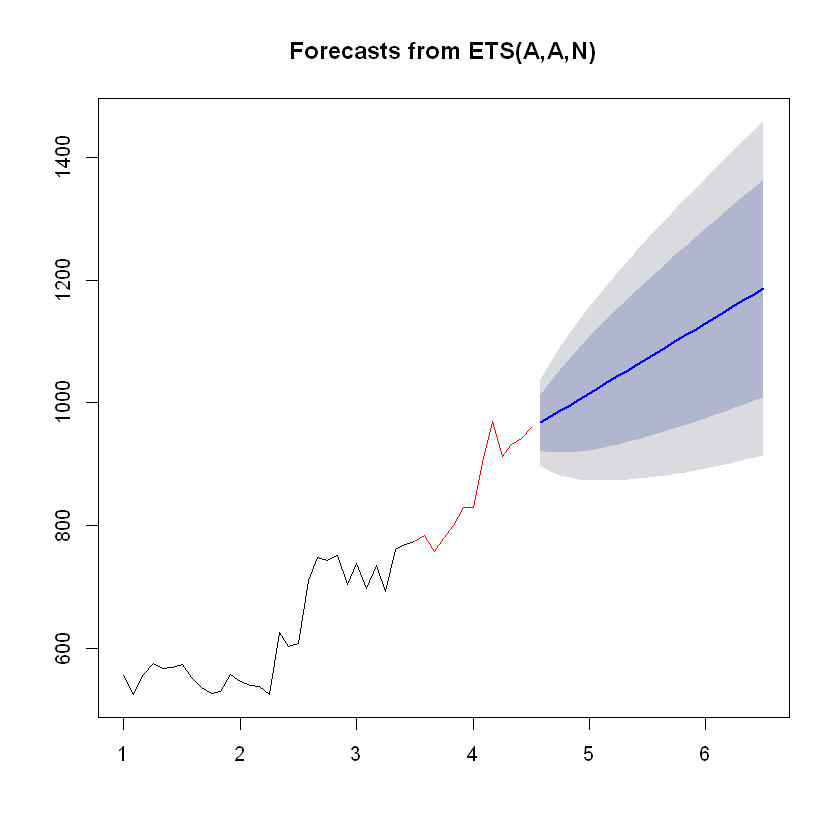

In [14]:
ets1<-ets(ts1Train, model = "AAN") # fit model
fcast<-forecast(ets1) #forcast on ets
plot(fcast)
lines(ts1Test, col="red")
fcast

In [15]:
accuracy(fcast, ts1Test)

Warning message in window.default(x, ...):
"'start' value not changed"

ERROR: Error in window.default(x, ...): 'start' cannot be after 'end'
